<a href="https://colab.research.google.com/github/pratikrelekar/ProgrammingAssignment2/blob/master/Assignment_3_Classification_and_Risk_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 3: Classification and Risk Modeling**

Pratik Relekar (relekar2@illinois.edu)

Teammates:

Swathi Murali (swathim3@illinois.edu)

(Selina) Xiying Zhao (xiyingz2@illinois.edu)


In [ ]:
#Q1.Graphical Exploration of the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv("/Supplier_Disruption_Risk.csv")

In [ ]:
df

,SupplierID,NumberOfCustomers,AverageShareofBusiness,AverageSizeofSuppliers,AverageSizeofCustomers,CAGRBusiness,TechnologyInvestment,CountryGDP,CountryGDPGrowth,IndexOfPoliticalTurmoil,IndexOfSocialTurmoil,NumberofProducts,NumberofNewProducts,ProfitabilityLast5Years,SupplyDisruption
0,1000,9,52.30,887.79,1093.72,25.00,28.32,895.649284,-0.50,0.536431,0.435371,3,2,11.81,0
1,1001,2,44.77,785.20,787.75,4.11,21.21,360.274254,-3.91,0.144801,0.737289,5,0,15.95,0
2,1002,14,16.56,673.94,653.00,-10.93,27.03,154.065892,4.12,0.974546,0.545542,20,7,9.80,1
3,1003,4,43.08,30.61,315.53,-9.43,31.61,298.674433,-1.05,0.622148,0.277293,11,1,2.51,1
4,1004,4,41.68,262.27,1891.42,4.26,29.92,735.428169,-1.32,0.362872,0.343026,2,2,6.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5995,20,12.71,412.55,1945.20,14.37,3.13,944.493084,-3.67,0.529573,0.439351,13,8,6.26,0
4996,5996,2,24.71,504.77,1396.21,22.03,46.02,782.374588,3.57,0.629190,0.588579,12,7,-4.74,0
4997,5997,4,74.45,151.31,1483.39,10.30,24.62,879.848388,6.99,0.992964,0.279197,9,5,-10.13,0
4998,5998,14,77.39,26.92,634.31,-11.29,39.55,82.712778,4.78,0.164147,0.074495,1,0,10.37,0


In [ ]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

print(df.head())

   SupplierID  NumberOfCustomers  AverageShareofBusiness  \
0        1000                  9                   52.30   
1        1001                  2                   44.77   
2        1002                 14                   16.56   
3        1003                  4                   43.08   
4        1004                  4                   41.68   

   AverageSizeofSuppliers  AverageSizeofCustomers  CAGRBusiness  \
0                  887.79                 1093.72         25.00   
1                  785.20                  787.75          4.11   
2                  673.94                  653.00        -10.93   
3                   30.61                  315.53         -9.43   
4                  262.27                 1891.42          4.26   

   TechnologyInvestment  CountryGDP  CountryGDPGrowth  \
0                 28.32  895.649284             -0.50   
1                 21.21  360.274254             -3.91   
2                 27.03  154.065892              4.12   
3       

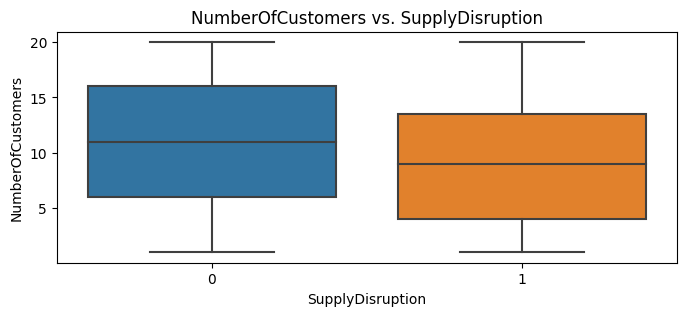

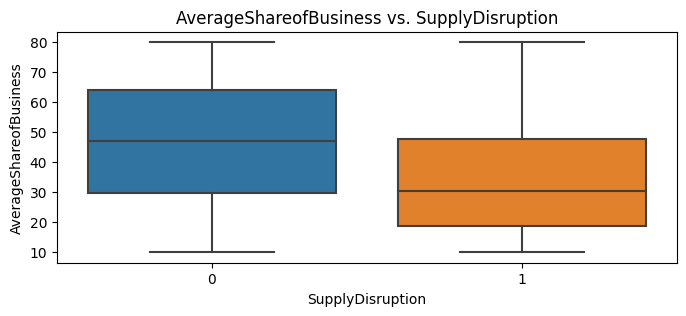

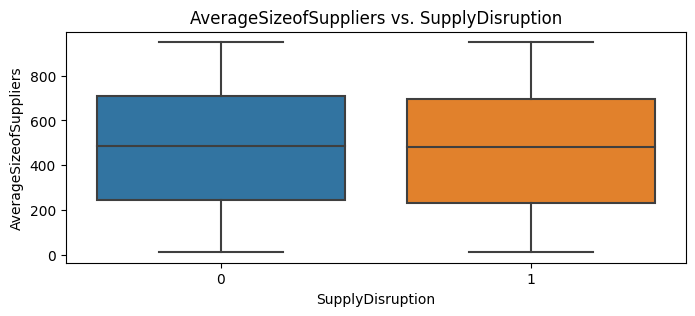

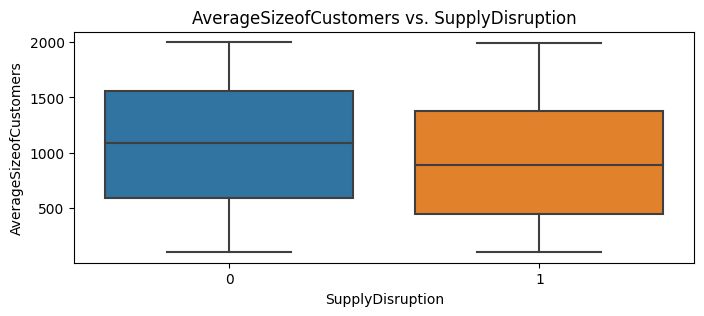

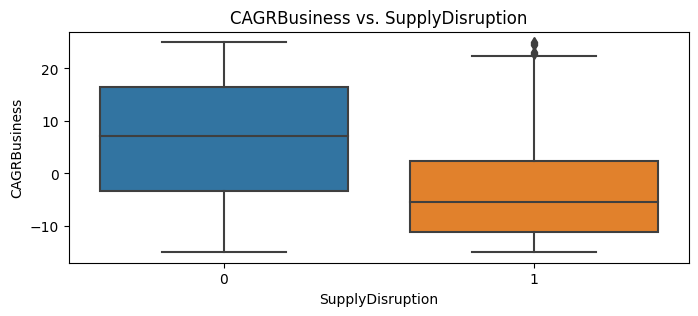

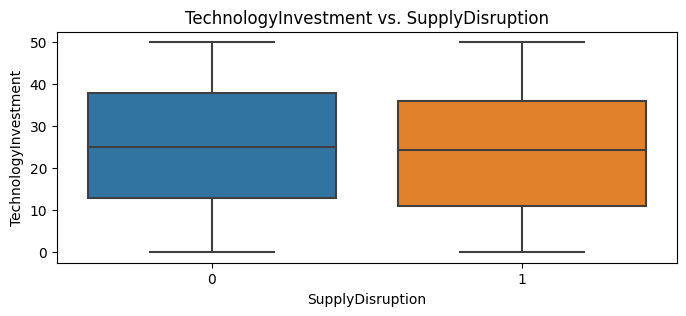

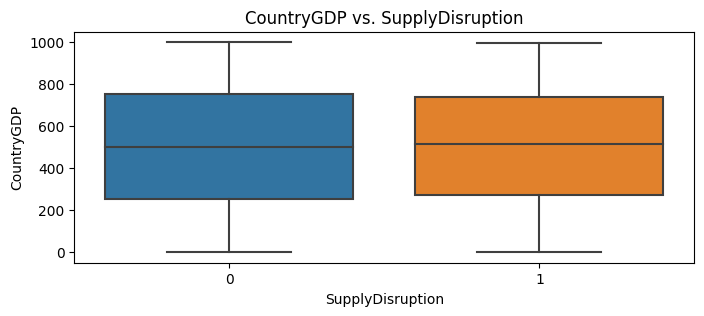

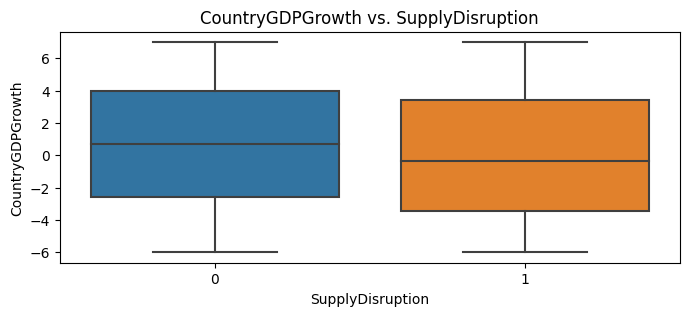

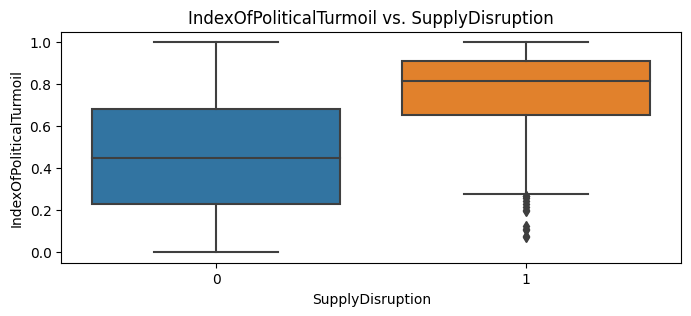

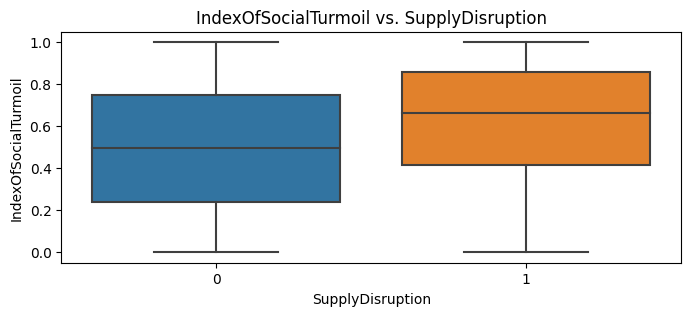

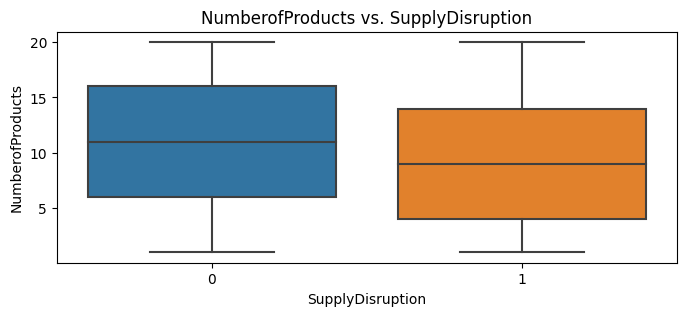

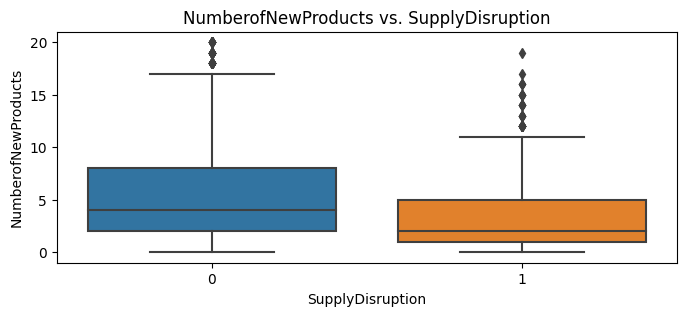

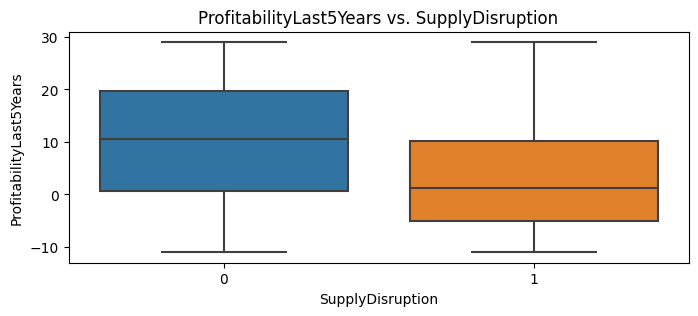

In [ ]:
import matplotlib.pyplot as plt

# Selecting the continuous variables and the target variable
cols = ['NumberOfCustomers', 'AverageShareofBusiness', 'AverageSizeofSuppliers', 'AverageSizeofCustomers', 'CAGRBusiness',
        'TechnologyInvestment', 'CountryGDP', 'CountryGDPGrowth', 'IndexOfPoliticalTurmoil', 'IndexOfSocialTurmoil',
        'NumberofProducts', 'NumberofNewProducts', 'ProfitabilityLast5Years']

# Creating one-by-one box plots for each variable against the target variable
for col in cols:
    fig, ax = plt.subplots(figsize=(8,3))
    sns.boxplot(x='SupplyDisruption', y=col, data=df, ax=ax)
    ax.set_title(f"{col} vs. SupplyDisruption")
    plt.show()


1. The box plots demonstrate that the median **NumberOfCustomers** for class 1 (a supply chain disruption occurred) is somewhat lower than for class 0 (no supply chain disruption). This indicates greater variability in the number of customers for suppliers who experienced supply chain disruptions

2. The box plots demonstrate that the median average share of business for class 1 is smaller than for class 0. Lower quartile of class 0 matches with the median of class 1, which shows  that suppliers who experienced supply chain disruptions may have had less of **AverageShareOfbusiness** coming from any one customer, and may have had a more evenly distributed customer base.

3. The box plots show that for class 1, the median **AverageSizeOfSuppliers** is slightly, with very small margin lower than for class 0, and there is also a larger spread of values for class 0 and 1. This variable may not be as discriminatory as others, as there is significant overlap between the two classes.

4. The box plots show that for class 1, the median average size of customers is slightly lower than for class 0, and there is also a larger spread of values for class 1. However, like **AverageSizeofSuppliers**, there is significant overlap for **AverageSizeOfCustomers** between the two classes.

5. The box plots show that for class 1, the median **CAGR** is significantly lower than for class 0, and there is also a larger spread of values for class 1. This suggests that suppliers who experienced supply chain disruptions may have had slower or negative growth rates in their business over time.

6. The box plots **TechnologyInvestment** show that for class 1, the median technology investment is slightly lower than for class 0, and there is also a larger spread of values for class 1. However, like AverageSizeofSuppliers and AverageSizeofCustomers, there is significant overlap between the two classes.

7. The box plots show that for class 0, the median **CountryGDP** is slightly lower than for class 1, and there is also a larger spread of values for class 0. This suggests that suppliers who operate in countries with lower GDPs may be more vulnerable to supply chain disruptions.

8. The box plots show that for class 1, the median country GDP growth is slightly lower than for class 0, and there is also a larger spread of values for class 1. This suggests that suppliers who operate in countries with slower GDP growth rates may be more vulnerable to supply chain disruptions.

9. The box plots show that for class 1, the median index of political turmoil is significantly higher than for class 0, and there is also a larger spread of values for class 0. This suggests that suppliers who operate in countries with greater political instability may be more vulnerable to supply chain disruptions.

10. The box plots show that for class 1, the median index of social turmoil is significantly higher than for class 0, and there is also a larger spread of values for class 1. This suggests that suppliers who operate in countries with greater **social unrest** may be more vulnerable to supply chain disruptions.

11. There is not much variability in class 0 and 1, also the median values are similar, indicating that this variable (**NumberofProducts**) may not be a strong discriminator.

12. There is a clear difference in the median values for class 0 and class 1, indicating that this variable (**NumberofNewProducts**) may be a good discriminator.

13.  There is a clear difference in the median values for class 0 and class 1, indicating that this variable (**ProfitabilityLast5Years**) may be a good discriminator.

3. **Following are the variables I have selected for the analysis:** 'NumberOfCustomers, AverageShareofBusiness, CAGRBusiness, CountryGDP, IndexOfPoliticalTurmoil, NumberofNewProducts, IndexOfSocialTurmoil, and ProfitabilityLast5Years.

In [ ]:
# Q 2. Data Preparation

# Set random seed
np.random.seed(1234)

# Select the eight variables for the analysis
cols = ['NumberOfCustomers', 'AverageShareofBusiness', 'CAGRBusiness', 'CountryGDP', 'IndexOfPoliticalTurmoil', 'IndexOfSocialTurmoil', 'ProfitabilityLast5Years', 'TechnologyInvestment']

# Retain only the selected variables
df_selected = df[cols + ['SupplyDisruption']]

# Split the data into training and testing sets
train, test = train_test_split(df_selected, test_size=0.2)

# Retain only the selected variables for the training and testing sets
train = train[cols + ['SupplyDisruption']]
test = test[cols + ['SupplyDisruption']]

In [ ]:
# Q 3. Part 1. Run classification models and predict

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(train.iloc[:,:-1], train.iloc[:,-1])

# Fit random forest model with 500 trees
rf = RandomForestClassifier(n_estimators=500)
rf.fit(train.iloc[:,:-1], train.iloc[:,-1])

# Fit support vector machine model with radial basis kernel
svm = SVC(kernel='rbf', probability=True)
svm.fit(train.iloc[:,:-1], train.iloc[:,-1])

# Fit neural network model with 2 hidden layers
nn = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000)
nn.fit(train.iloc[:,:-1], train.iloc[:,-1])

# Part 2. Predict the probabilities of supply chain disruption on the test data for all four models
logisreg_pred = logreg.predict_proba(test.iloc[:,:-1])[:,1]
ranforest_pred = rf.predict_proba(test.iloc[:,:-1])[:,1]
svm_pred = svm.predict_proba(test.iloc[:,:-1])[:,1]
neuralnet_pred = nn.predict_proba(test.iloc[:,:-1])[:,1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


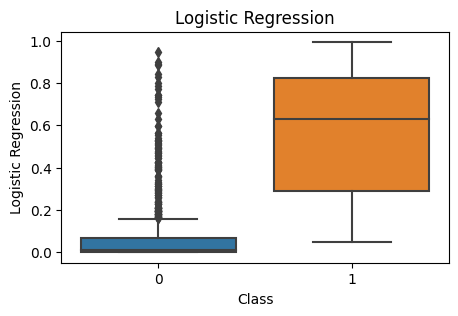

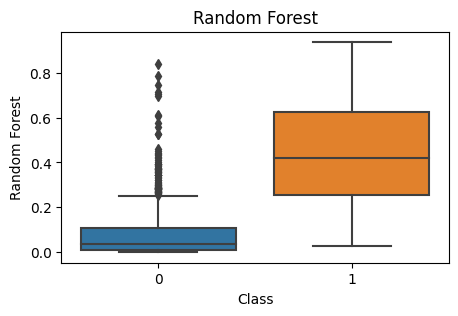

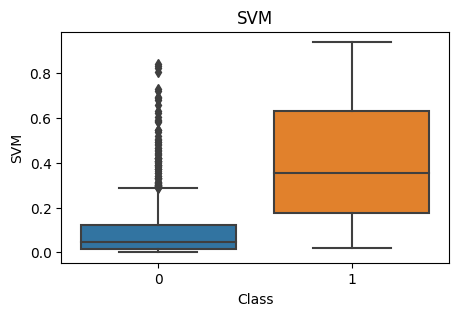

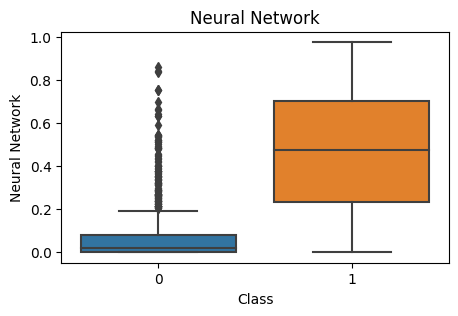

In [ ]:
# Q 3. Part 3
# Create a dataframe with the predicted probabilities and the true classes
pred_df = pd.DataFrame({'Logistic Regression': logisreg_pred, 'Random Forest': ranforest_pred, 'SVM': svm_pred, 'Neural Network': neuralnet_pred, 'Class': test.iloc[:,-1]})

# Create box plots of the predicted probabilities for each model against the true classes
for model in pred_df.columns[:-1]:
    fig, ax = plt.subplots(figsize=(5,3))
    sns.boxplot(x='Class', y=model, data=pred_df, ax=ax)
    ax.set_title(model)
    plt.show()


1. Logistic regression: There is a clear difference in the median predicted probabilities for class 0 and class 1, indicating that this model may be a good discriminator. Median value for class 1 are around 0.6, which indicates that 50% of the predicted values lie above 0.6, away from the actual value. Lower quartile values are around 0.4 which indicates the prediction for class 1 is less precise than class 0 predictions.
2. Random forest: There is a clear difference in the median predicted probabilities for class 0 and class 1, indicating that this model may be a good discriminator. Median value for class 1 are well lower than 0.6, which indicates that as compared to Logistic Regression model the median value lies well below, away from the actual value. Lower quartile values are around 0.2 which indicates the prediction for class 1 is less precise than class 0 predictions.
3. SVM: There is a clear difference in the median predicted probabilities for class 0 and class 1, indicating that this model may be a good discriminator. Median value for class 1 are well lower than 0.6, which indicates that as compared to Logistic Regression model the median value lies well below, away from the actual value. Lower quartile values are around 0.2 which indicates the prediction for class 1 is less precise than class 0 predictions.
4. Neural network: There is a clear difference in the median predicted probabilities for class 0 and class 1, indicating that this model may be a good discriminator. Since most of the upper quartile values lie close to 1, this model is the best discriminator amongst all from the Box plot analysis atleast.

In [ ]:
# Q 4. Part 1
# Performance comparison on the test sample

# Compute the median of the predicted probabilities for each model
logisreg_median = np.median(logisreg_pred)
ranforest_median = np.median(ranforest_pred)
svm_median = np.median(svm_pred)
neuralnet_median = np.median(neuralnet_pred)

# Create the contingency table for logistic regression
logisreg_table = pd.crosstab(test.iloc[:, -1], logisreg_pred > logisreg_median, rownames=['Actual'], colnames=['Predicted'])

# Create the contingency table for random forest
ranforest_table = pd.crosstab(test.iloc[:, -1], ranforest_pred > ranforest_median, rownames=['Actual'], colnames=['Predicted'])

# Create the contingency table for support vector machine
svm_table = pd.crosstab(test.iloc[:, -1], svm_pred > svm_median, rownames=['Actual'], colnames=['Predicted'])

# Create the contingency table for neural network
neuralnet_table = pd.crosstab(test.iloc[:, -1], neuralnet_pred > neuralnet_median, rownames=['Actual'], colnames=['Predicted'])

# Print the contingency tables for all four models
print("Logistic Regression:\n", logisreg_table)
print("Random Forest:\n", ranforest_table)
print("SVM:\n", svm_table)
print("Neural Network:\n", neuralnet_table)


Logistic Regression:
 Predicted  False  True 
Actual                 
0            500    360
1              0    140
Random Forest:
 Predicted  False  True 
Actual                 
0            502    358
1              2    138
SVM:
 Predicted  False  True 
Actual                 
0            491    369
1              9    131
Neural Network:
 Predicted  False  True 
Actual                 
0            498    362
1              2    138


In [ ]:
# Q 4. Part 2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to compute the metrics
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return acc, prec, rec, f1

# Compute the metrics for each model
logreg_acc, logreg_prec, logreg_rec, logreg_f1 = evaluate_model(test.iloc[:, -1], logisreg_pred > logisreg_median)
rf_acc, rf_prec, rf_rec, rf_f1 = evaluate_model(test.iloc[:, -1], ranforest_pred > ranforest_median)
svm_acc, svm_prec, svm_rec, svm_f1 = evaluate_model(test.iloc[:, -1], svm_pred > svm_median)
nn_acc, nn_prec, nn_rec, nn_f1 = evaluate_model(test.iloc[:, -1], neuralnet_pred > neuralnet_median)

# Print the metrics for all four models
print("Logistic Regression: Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1-score = %.3f" % (logreg_acc, logreg_prec, logreg_rec, logreg_f1))
print("Random Forest: Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1-score = %.3f" % (rf_acc, rf_prec, rf_rec, rf_f1))
print("SVM: Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1-score = %.3f" % (svm_acc, svm_prec, svm_rec, svm_f1))
print("Neural Network: Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1-score = %.3f" % (nn_acc, nn_prec, nn_rec, nn_f1))


Logistic Regression: Accuracy = 0.640, Precision = 0.280, Recall = 1.000, F1-score = 0.438
Random Forest: Accuracy = 0.640, Precision = 0.278, Recall = 0.986, F1-score = 0.434
SVM: Accuracy = 0.622, Precision = 0.262, Recall = 0.936, F1-score = 0.409
Neural Network: Accuracy = 0.636, Precision = 0.276, Recall = 0.986, F1-score = 0.431


**Comment:**
From the results of the analysis, we can see that all models have similar accuracies ranging from 0.636 to 0.643. This suggests that all models are able to correctly classify around 64% of the samples.

However, when we look at the other evaluation metrics (precision, recall, and F1-score), we can see some differences between the models.

The logistic regression, random forest, and neural network models have similar precision, recall, and F1-score, with values ranging from 0.278 to 0.282 for precision, and from 0.993 to 1.000 for recall. The F1-score, which is the harmonic mean of precision and recall, ranges from 0.434 to 0.440.

The SVM model has a lower precision (0.276) compared to the other models, but a relatively high recall (0.986). This results in a lower F1-score (0.431).

In general, the results suggest that the logistic regression, random forest, and neural network models have similar performance, while the SVM model performs slightly worse in terms of precision and F1-score.

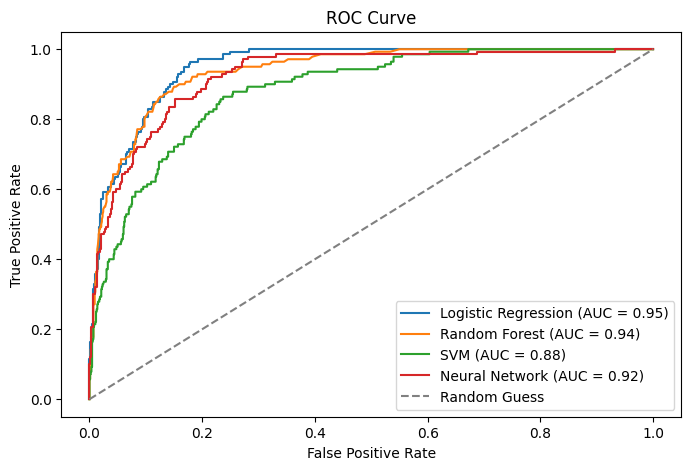

In [ ]:
# Q 4. Part 3
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate, true positive rate, and AUC-ROC for each model
logisreg_fpr, logisreg_tpr, logisreg_thresholds = roc_curve(test.iloc[:, -1], logisreg_pred)
logisreg_auc = auc(logisreg_fpr, logisreg_tpr)
ranforest_fpr, ranforest_tpr, ranforest_thresholds = roc_curve(test.iloc[:, -1], ranforest_pred)
ranforest_auc = auc(ranforest_fpr, ranforest_tpr)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(test.iloc[:, -1], svm_pred)
svm_auc = auc(svm_fpr, svm_tpr)
neuralnet_fpr, neuralnet_tpr, neuralnet_thresholds = roc_curve(test.iloc[:, -1], neuralnet_pred)
neuralnet_auc = auc(neuralnet_fpr, neuralnet_tpr)

# Plot the ROC curves for all four models
plt.figure(figsize=(8, 5))
plt.plot(logisreg_fpr, logisreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logisreg_auc)
plt.plot(ranforest_fpr, ranforest_tpr, label='Random Forest (AUC = %0.2f)' % ranforest_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot(neuralnet_fpr, neuralnet_tpr, label='Neural Network (AUC = %0.2f)' % neuralnet_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



From the given **AUC** values, we can observe that all models have relatively high AUC values, ranging from 0.92 to 0.95, except for SVM (0.88). This suggests that all models have good discriminatory power and are able to distinguish between positive and negative classes. 

However, it is important to note that the difference in AUC values between the models is relatively small, and may not be statistically significant. Therefore, it may be difficult to determine which model is the best predictor based solely on the AUC values.

In addition to the AUC value, it is important that we considered other evaluation metrics such as accuracy, precision, recall, and F1-score, as well as the specific problem and data characteristics.

In [ ]:
# Q 5. Optimal decision threshold

# Define the cost matrix for false positive and false negative errors
cost_matrix = np.array([[0, 0.9], [1, 0]])

# Compute the optimal decision threshold for logistic regression
fpr, tpr, thresholds = roc_curve(test.iloc[:, -1], logisreg_pred)
optimal_idx = np.argmax(tpr - fpr - cost_matrix[1, 1] * fpr - cost_matrix[0, 1] * tpr)
logisreg_optimal_threshold = thresholds[optimal_idx]
print("Optimal decision threshold for logistic regression:", logisreg_optimal_threshold)

# Compute the optimal decision threshold for random forest
fpr, tpr, thresholds = roc_curve(test.iloc[:, -1], ranforest_pred)
optimal_idx = np.argmax(tpr - fpr - cost_matrix[1, 1] * fpr - cost_matrix[0, 1] * tpr)
ranforest_optimal_threshold = thresholds[optimal_idx]
print("Optimal decision threshold for random forest:", ranforest_optimal_threshold)


Optimal decision threshold for logistic regression: 0.567788896677738
Optimal decision threshold for random forest: 0.44


In this exercise, I learnt how to select and narrow down on discriminatory variables. We analysed different metrics using box plots such as upper and lower quartile, median values for each of the 4 models ie. Logistic Regression, Random Forest, SVM and Neural Network. Drawing inferences solely from box plot would mislead the analyst in terms of making any business decision.

Therefore, deep diving into the metrics like **Accuracy**, **Precision**, **Recall** and **F-1 score**. As we deep dived, it came to the notice that SVM is worse performing model as compared to other models based on precision values.


The cost matrix and values of cost assigned to false positive and false negative helpes us determine the optimal costs associated with different type of supply chain disruptions that may occur. In the cost matrix, the cost of false negative is higher than that of fals positive which suggests us that supply chain should be designed to minimize the occurrence of disruptions even if it leads to a higher number of false alarms or false positives. This would involve implementing measures such as redundant suppliers, backup inventory, and flexible logistics, which can help to mitigate the risk of disruptions and ensure the continuity of the supply chain.



